In [10]:
import pandas as pd

data = {
    "type": ["Movie", "TV Show", "Movie", "Movie", "TV Show"],
    "country": ["India", "USA", "UK", None, "Canada"],
    "director": ["Dir1", "Dir2", None, "Dir4", "Dir5"],
    "release_year": [2020, 2019, 2021, 2018, 2022]
}

df = pd.DataFrame(data)
df.to_csv("netflix.csv", index=False)

In [11]:
df = pd.read_csv("netflix.csv")
df.head()

,type,country,director,release_year
0,Movie,India,Dir1,2020
1,TV Show,USA,Dir2,2019
2,Movie,UK,NaN,2021
3,Movie,NaN,Dir4,2018
4,TV Show,Canada,Dir5,2022


In [12]:
print(df.isnull().sum())

df['country'].fillna("Unknown", inplace=True)
df.dropna(subset=['director'], inplace=True)
df.drop_duplicates(inplace=True)

df.head()

type            0
country         1
director        1
release_year    0
dtype: int64


C:\Users\yashw\AppData\Local\Temp\ipykernel_19876\581101638.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['country'].fillna("Unknown", inplace=True)


,type,country,director,release_year
0,Movie,India,Dir1,2020
1,TV Show,USA,Dir2,2019
3,Movie,NaN,Dir4,2018
4,TV Show,Canada,Dir5,2022


In [13]:
print(df['type'].value_counts())
df.sort_values(by='release_year', ascending=False).head()

type
Movie      2
TV Show    2
Name: count, dtype: int64


,type,country,director,release_year
4,TV Show,Canada,Dir5,2022
0,Movie,India,Dir1,2020
1,TV Show,USA,Dir2,2019
3,Movie,NaN,Dir4,2018


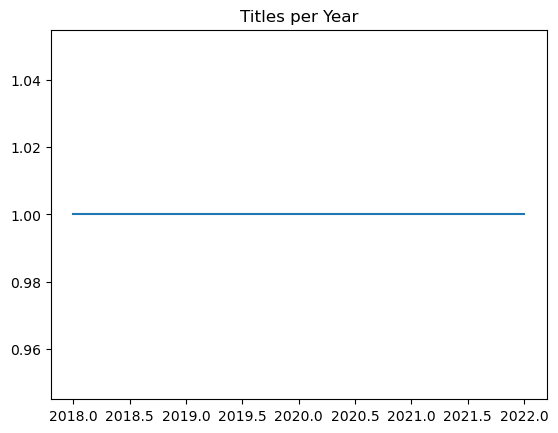

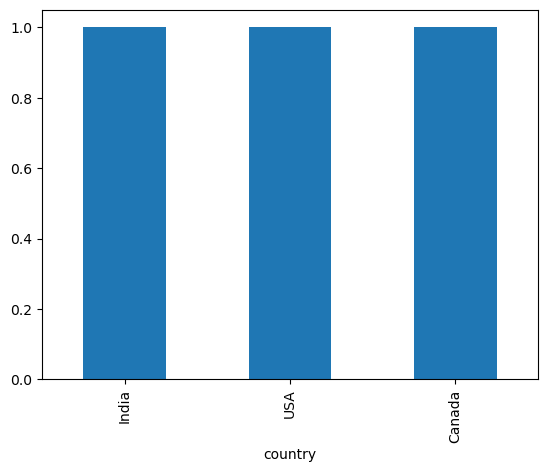

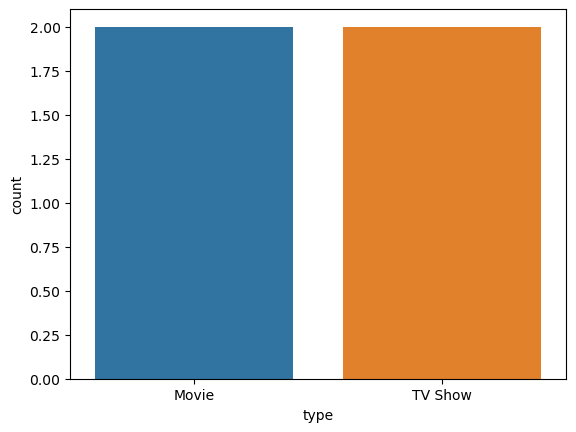

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend
trend = df['release_year'].value_counts().sort_index()
plt.plot(trend.index, trend.values)
plt.title("Titles per Year")
plt.show()

# Countries
df['country'].value_counts().plot(kind='bar')
plt.show()

# Movies vs TV
sns.countplot(x='type', data=df)
plt.show()

In [15]:
df.to_csv("netflix_cleaned.csv", index=False)